<a href="https://colab.research.google.com/github/Zahramashayekhpour/organic-and-nonorganic-fruit-classification/blob/master/deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import itertools
import tensorflow as tf
from tensorflow.keras import layers
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import cv2
from sklearn.model_selection import train_test_split

###  ! pip install TensorBoardColab   ## we use it when we use tensorflow.1 , But in Jupyter notebook is OK!
from tensorflow.keras.models import Sequential,Model # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools
##   from tensorflow.keras.callbacks import TensorBoard  #Visulization of Accuracy and loss
##   from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback



In [ ]:
pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

train_dir = "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/mushroom/splited/train"
validation_dir = "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/mushroom/splited/val"
test_dir = "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/mushroom/splited/test"
#train_aug_dir= "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/aug"


In [ ]:

import glob
trn_fnames = glob.glob(f'{train_dir}/*/*.jpg')
train_count = len(trn_fnames)
valid_fnames = glob.glob(f'{validation_dir}/*/*.jpg')
val_count = len(valid_fnames)
test_fnames = glob.glob(f'{test_dir}/*/*.jpg')
test_count = len(test_fnames)

print('total training  images:',train_count)
print('total validation  images:', val_count)
print('total test  images:', test_count)


total training  images: 305
total validation  images: 99
total test  images: 92


In [ ]:
#data generators
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    #vertical_flip=True,
    fill_mode='nearest')

test_datagen= ImageDataGenerator(
    rescale=1./255,
    #rotation_range=25,
    fill_mode='nearest')

train_batches=train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    interpolation='nearest'
    #save_to_dir="/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/aug"
    )

validation_batches=test_datagen.flow_from_directory(
    validation_dir,
    shuffle=False,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    interpolation='nearest')

test_batches=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical',)



Found 305 images belonging to 2 classes.
Found 99 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [ ]:
model = tf.keras.applications.VGG16(weights='imagenet',  input_shape=(224, 224, 3), include_top=False)
                                ## weights='None' ,  means that use random weights for this model
for layer in model.layers:
  layer.trainable = False
model.summary()

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.regularizers import l2

Model = Sequential()
Model.add(model)
#Model.add(layers.Conv2D(528, (3, 3), activation='relu'))
Model.add(layers.GlobalAveragePooling2D())
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
#Model.add(Dense(256, activation='relu'))

#Model.add(layers.Flatten())
#Model.add(Dense(128, activation='relu'))
#Model.add(BatchNormalization())
#Model.add(Dropout(0.25))

Model.add(Dense(2, activation='softmax'))

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.4 MB/s eta 0:00:00


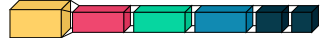

In [ ]:
import visualkeras


visualkeras.layered_view(Model).show() # display using your system viewer
visualkeras.layered_view(Model, to_file='output.png') # write to disk
visualkeras.layered_view(Model, to_file='output.png').show() # write and show

visualkeras.layered_view(Model)

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 2)                 5

In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks
initial_learning_rate = 0.0001
#Model.compile(optimizer=optimizers.Adam(learning_rate=initial_learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Model.compile(optimizer=optimizers.Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Model compilation is an activity performed after writing the statements in a model and before training starts.
# It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics.
# A compiled model is needed for training but not necessary for predicting.

In [ ]:
# Define a learning rate decay schedule
#def lr_schedule(epoch):
 #   return initial_learning_rate * 0.95 ** epoch
%%time
# Create a learning rate scheduler callback
#lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)
#hist=Model.fit(train_batches , validation_data=validation_batches,callbacks=[lr_scheduler], verbose=2, epochs=100, batch_size=32)
hist=Model.fit(train_batches, validation_data=validation_batches, verbose=2, epochs=100, batch_size=32)

Epoch 1/100
10/10 - 73s - loss: 1.0888 - accuracy: 0.5639 - val_loss: 1.0117 - val_accuracy: 0.5859 - 73s/epoch - 7s/step
Epoch 2/100
10/10 - 5s - loss: 1.0099 - accuracy: 0.6197 - val_loss: 0.9992 - val_accuracy: 0.6061 - 5s/epoch - 505ms/step
Epoch 3/100
10/10 - 7s - loss: 0.9095 - accuracy: 0.6918 - val_loss: 0.9885 - val_accuracy: 0.5960 - 7s/epoch - 695ms/step
Epoch 4/100
10/10 - 5s - loss: 0.8546 - accuracy: 0.7541 - val_loss: 0.9776 - val_accuracy: 0.6263 - 5s/epoch - 508ms/step
Epoch 5/100
10/10 - 9s - loss: 0.7782 - accuracy: 0.7705 - val_loss: 0.9691 - val_accuracy: 0.6061 - 9s/epoch - 853ms/step
Epoch 6/100
10/10 - 5s - loss: 0.7815 - accuracy: 0.7836 - val_loss: 0.9605 - val_accuracy: 0.6061 - 5s/epoch - 532ms/step
Epoch 7/100
10/10 - 5s - loss: 0.7630 - accuracy: 0.8033 - val_loss: 0.9506 - val_accuracy: 0.6263 - 5s/epoch - 508ms/step
Epoch 8/100
10/10 - 10s - loss: 0.7684 - accuracy: 0.7869 - val_loss: 0.9402 - val_accuracy: 0.6667 - 10s/epoch - 977ms/step
Epoch 9/100
10/

In [ ]:
hist.history.keys()    # the output is the valued which stored in the hist

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#hist.history['loss']    #loss value in each epoch

In [ ]:
loss_df = pd.DataFrame({'val Loss': hist.history['val_loss'] })
val_accuracy_df = pd.DataFrame({'val_accuracy Loss': hist.history['val_accuracy'] })

loss_df.to_csv('/content/gdrive/MyDrive/df_val(loss-acc)/val_loss_lr.csv')
val_accuracy_df.to_csv('/content/gdrive/MyDrive/df_val(loss-acc)/val_accuracy_lr.csv')

In [ ]:
loss_df

,val Loss
0,1.011696
1,0.999188
2,0.988458
3,0.977587
4,0.969060
...,...
95,0.353430
96,0.352243
97,0.351017
98,0.349979


In [ ]:
score = Model.evaluate(train_batches, verbose=2) #Evaluation of the model on the train dataset
print('train loss:', score[0])
print('train accuracy:', score[1])
loss, accuracy = Model.evaluate(validation_batches, verbose=2) #Evaluation of the model on the validation dataset
print('validation loss:', loss)
print('validation accuracy:', accuracy)
loss, accuracy = Model.evaluate(test_batches, verbose=2) #Evaluation of the model on the test dataset
print('test loss:', loss)
print('test accuracy:', accuracy)

10/10 - 6s - loss: 0.3446 - accuracy: 0.9770 - 6s/epoch - 552ms/step
train loss: 0.34464073181152344
train accuracy: 0.9770491719245911
4/4 - 1s - loss: 0.3475 - accuracy: 0.9697 - 833ms/epoch - 208ms/step
validation loss: 0.3474560081958771
validation accuracy: 0.9696969985961914
3/3 - 17s - loss: 0.4193 - accuracy: 0.9130 - 17s/epoch - 6s/step
test loss: 0.41927552223205566
test accuracy: 0.9130434989929199


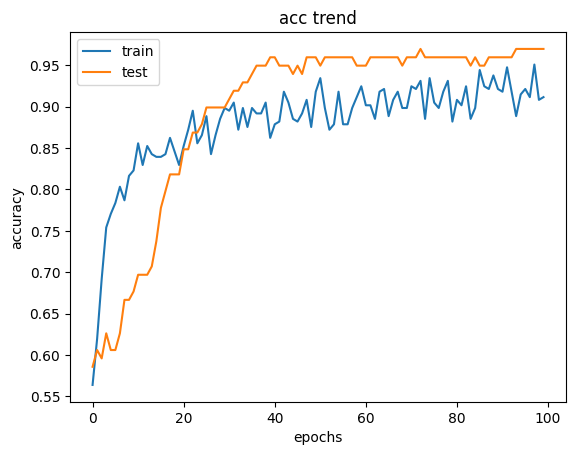

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acc trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

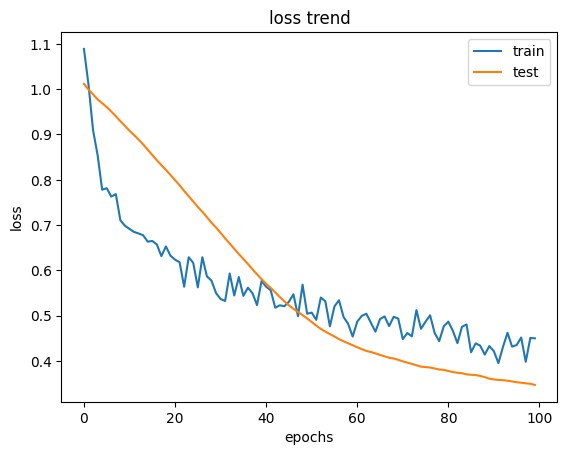

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()